# Lab4 -Srinivas Murthy Jonalagada Ramu -  100981801

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
# Encode the categorical "Species" column BEFORE correlation analysis
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

# Exploratory Data Analysis (EDA)
print("Dataset Overview:\n", df.info())
print("Summary Statistics:\n", df.describe())
print("Class Distribution:\n", df["Species"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int32  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 8.2 KB
Dataset Overview:
 None
Summary Statistics:
           Species       Weight     Length1     Length2     Length3  \
count  159.000000   159.000000  159.000000  159.000000  159.000000   
mean     2.264151   398.326415   26.247170   28.415723   31.227044   
std      1.704249   357.978317    9.996441   10.716328   11.610246   
min      0.000000     0.000000    7.500000    8.400000    8.800000   
25%      1.000000   120.000000   19.050000   21.000000   23.150000   
50%      2.000000   273.000000   25.200

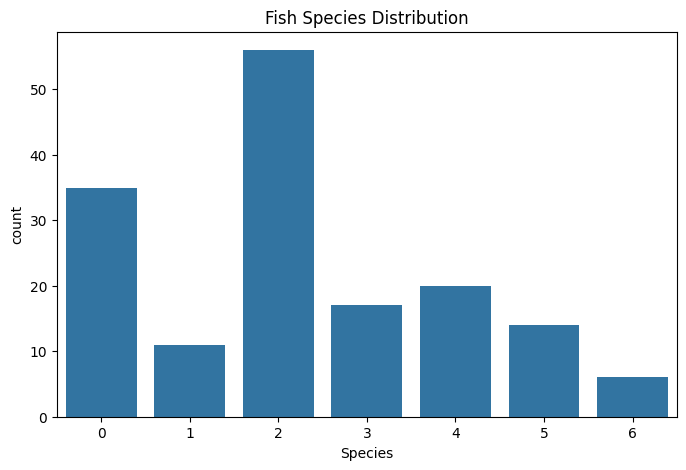

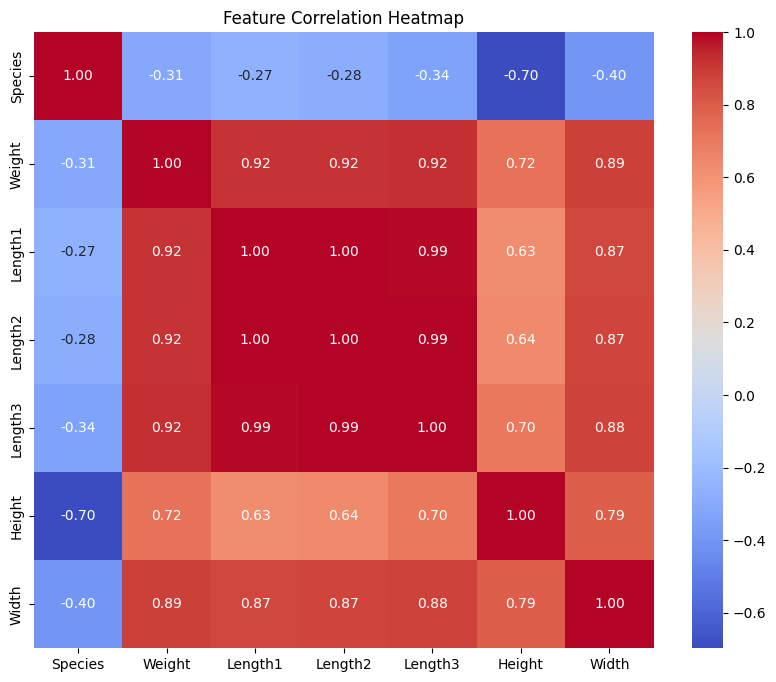

In [5]:
# Visualizing class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Species", data=df)
plt.title("Fish Species Distribution")
plt.show()

# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\SriniShru\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SriniShru\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SriniShru\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Model Accuracy: 0.7916666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       0.64      0.88      0.74         8
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         3
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         1

    accuracy                           0.79        24
   macro avg       0.61      0.70      0.65        24
weighted avg       0.68      0.79      0.73        24

Confusion Matrix:
 [[5 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 7 0 0 1 0]
 [0 0 0 3 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 1 0 0 0 0]]
ROC-AUC Score: 0.9877232142857143


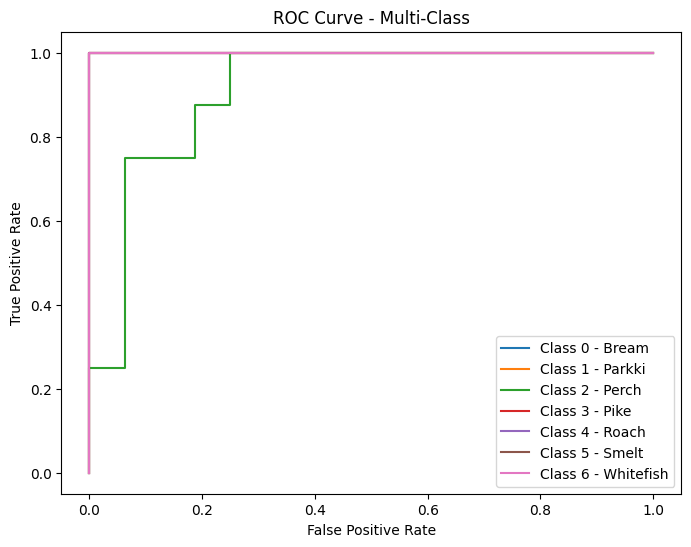

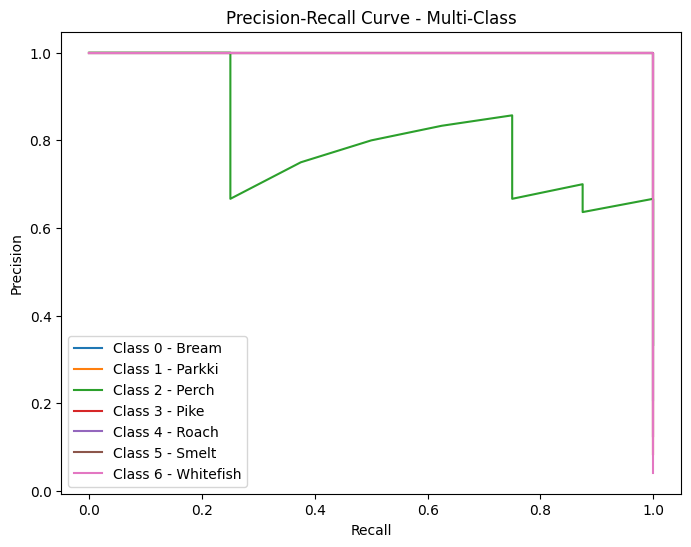

In [6]:
# Select features and target
X = df.drop(columns=["Species"])
y = df["Species"]

# Split data into train, test, and OOS validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_test, X_oos, y_test, y_oos = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_oos = scaler.transform(X_oos)

# Train Logistic Regression Classifier
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Evaluate Model on Test Data
y_pred = log_reg_model.predict(X_test)
y_proba = log_reg_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

print("Model Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC Score:", roc_auc)

# ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {i} - {label_encoder.classes_[i]}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-Class")
plt.legend()
plt.show()

# Precision-Recall Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    precision, recall, _ = precision_recall_curve(y_test, y_proba[:, i], pos_label=i)
    plt.plot(recall, precision, label=f'Class {i} - {label_encoder.classes_[i]}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Multi-Class")
plt.legend()
plt.show()

In [7]:
# Population Stability Index (PSI) Calculation
def psi(expected, actual, bins=10):
    expected_percents, _ = np.histogram(expected, bins=bins, density=True)
    actual_percents, _ = np.histogram(actual, bins=bins, density=True)
    psi_values = (expected_percents - actual_percents) * np.log(expected_percents / actual_percents)
    return np.sum(psi_values)

psi_value = psi(X_train.flatten(), X_test.flatten())
print("Population Stability Index (PSI):", psi_value)

# Save the trained Logistic Regression model
with open("fish_species_logreg.pkl", "wb") as file:
    pickle.dump(log_reg_model, file)

# Save the label encoder
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

# Save the scaler for future use
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model, scaler, and encoder saved successfully.")

Population Stability Index (PSI): 1.1264644208351837
Model, scaler, and encoder saved successfully.
